# PREDICTING COMPRESSIVE STRENGTH OF CONCRETE

#### Importing Libraries

In [1]:
from pyforest import*
%matplotlib inline

#### load the csv

In [90]:
df = pd.read_csv('csc.csv')

<IPython.core.display.Javascript object>

In [4]:
df.head(5)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


Observation
  1. It shows that there are eight independent variables(cement, slag, ash,water,superplastic,coarseagg,fineagg,age)and one dependent variable(strength)
  2. All the records are numeric

In [91]:
df.columns = ['cement', 'slag', 'ash', 'Water','superplastic','coarseagg','fineagg','age','strength']

In [5]:
df.head()

,cement,slag,ash,Water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [45]:
df.dtypes

cement          float64
slag            float64
ash             float64
Water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [47]:
# Checking for missing values
df.isnull().sum()

cement          0
slag            0
ash             0
Water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [55]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1500x1000 with 0 Axes>

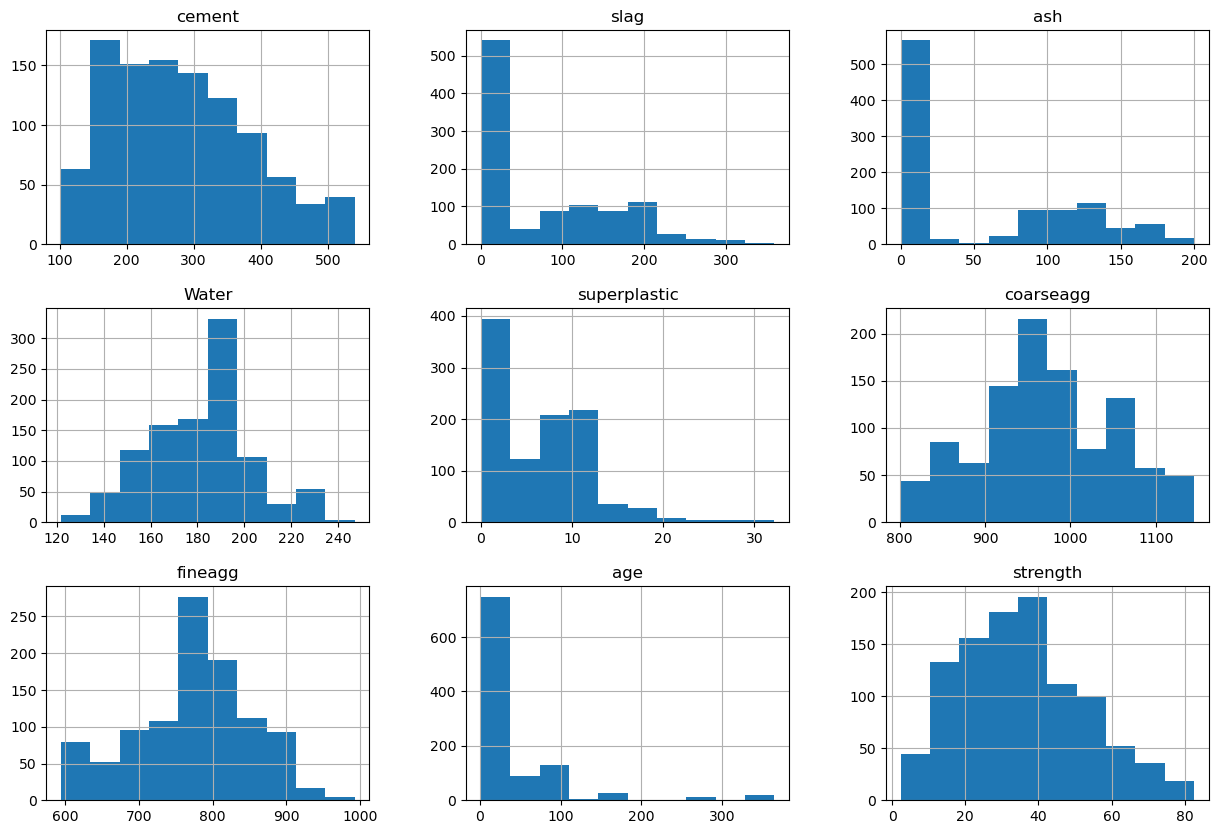

In [50]:
df.hist(figsize=(15,10))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

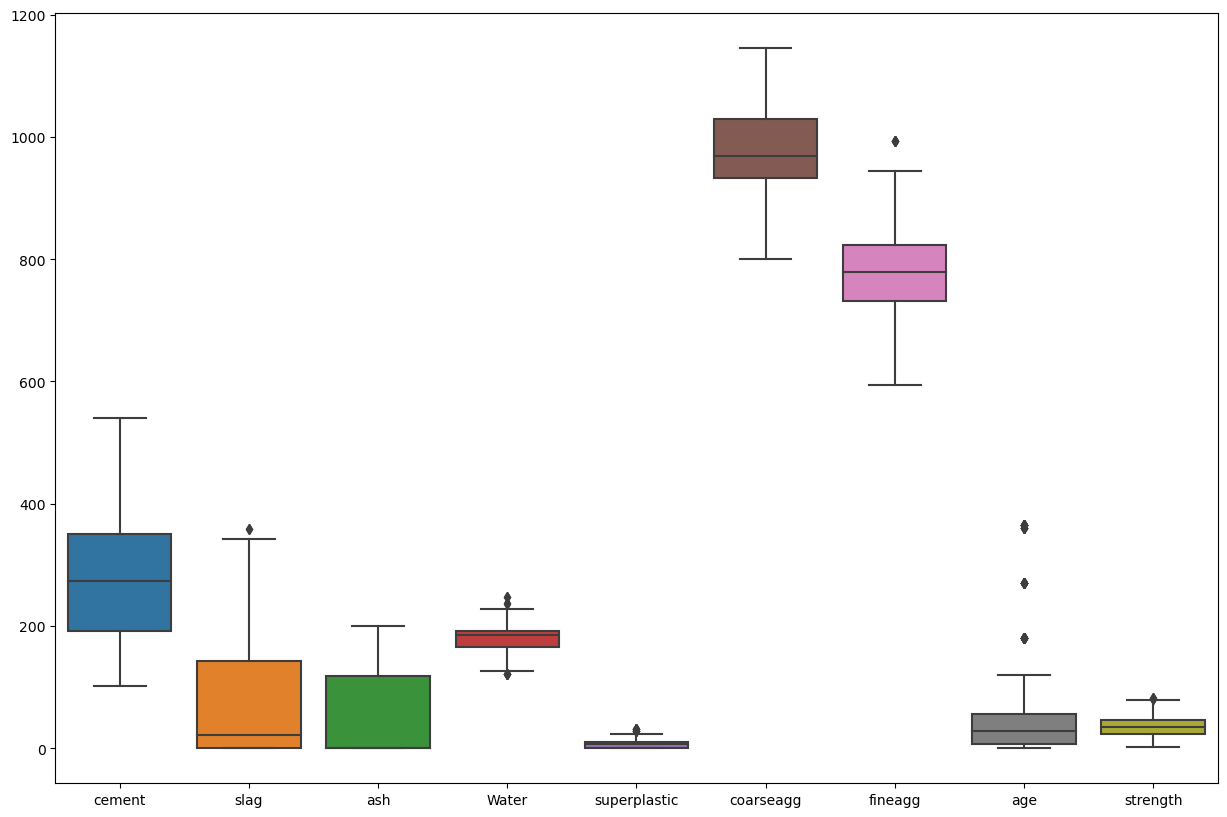

In [54]:
plt.figure(figsize=(15,10))
sns.boxplot(df)
plt.show();

# EXPLORATORY DATA ANALYSIS 

**CEMENT**

In [6]:
# Quartiles
from scipy import stats

Q1 = df['cement'].quantile(q=0.25)
Q3 = df['cement'].quantile(q=0.75)
print(f'1st Quartile (Q1) is: {Q1}')
print(f'3rd Quartile (Q3) is: {Q3}')
print(f"Interquartile range (IQR) is: {stats.iqr(df['cement'])}")

1st Quartile (Q1) is: 192.375
3rd Quartile (Q3) is: 350.0
Interquartile range (IQR) is: 157.625


In [7]:
#Outlier detection from Interquartile range (IQR) in original data


L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outlier limit in cement: ',L_outliers)
print('Upper outlier limit in cement: ',U_outliers)

Lower outlier limit in cement:  -44.0625
Upper outlier limit in cement:  586.4375


<IPython.core.display.Javascript object>

<Axes: xlabel='cement'>

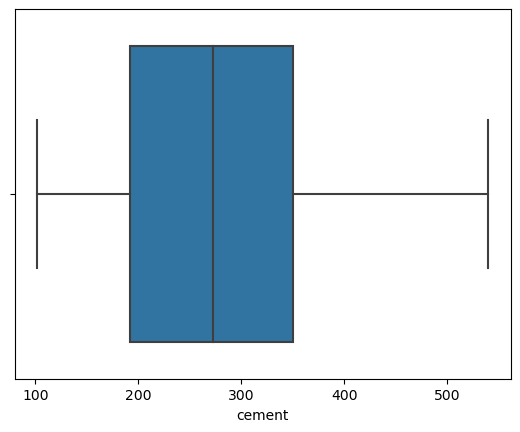

In [8]:
sns.boxplot(x='cement',data=df)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

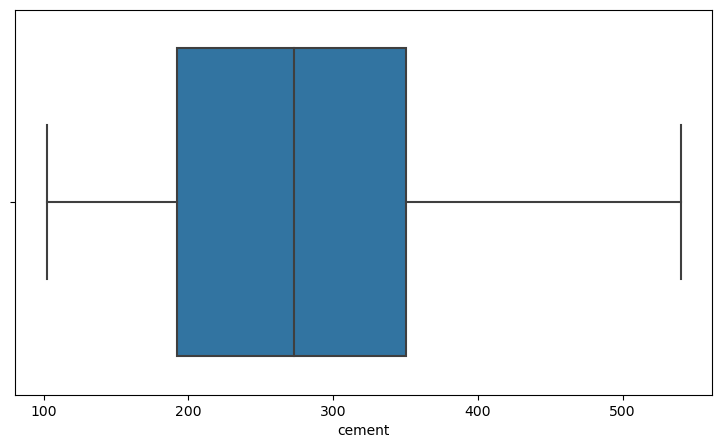

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

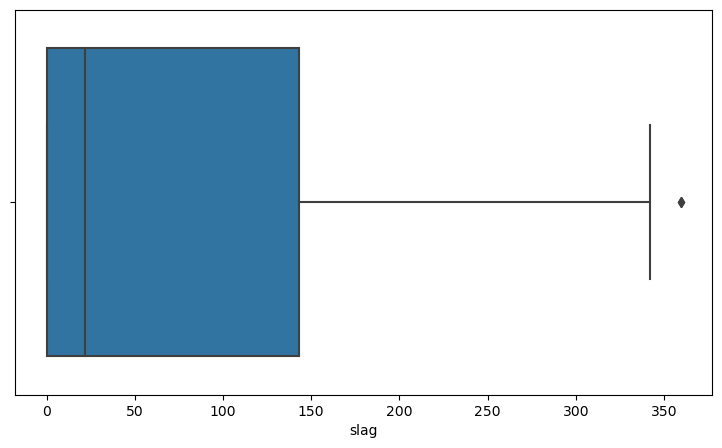

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

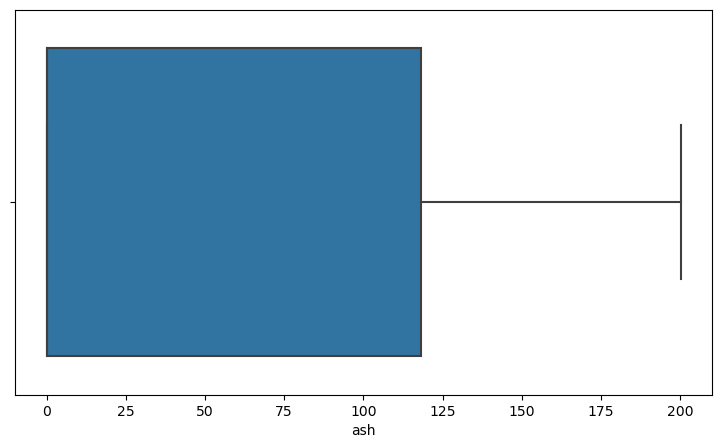

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

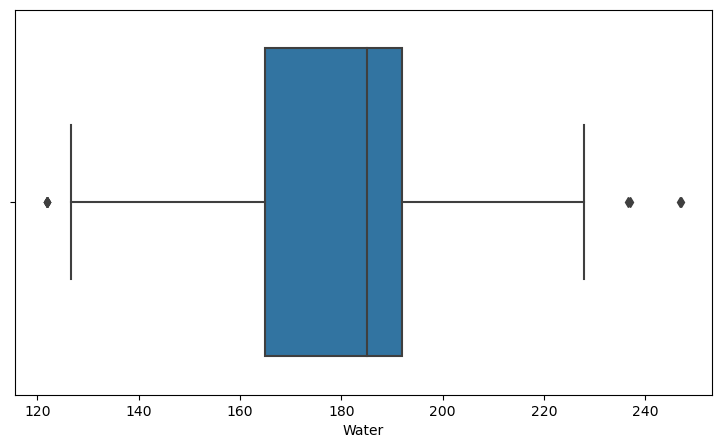

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

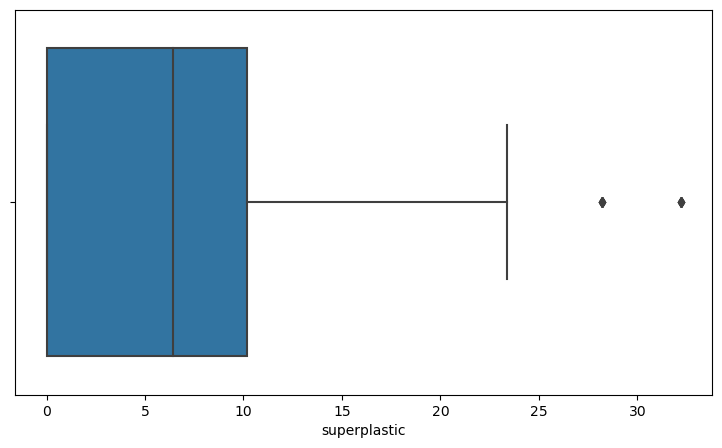

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

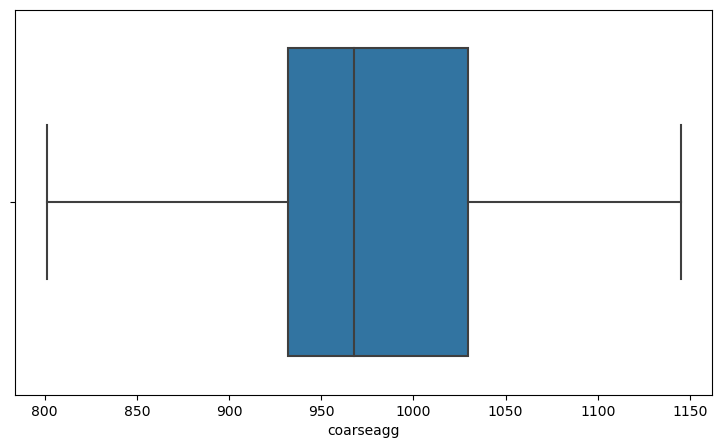

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

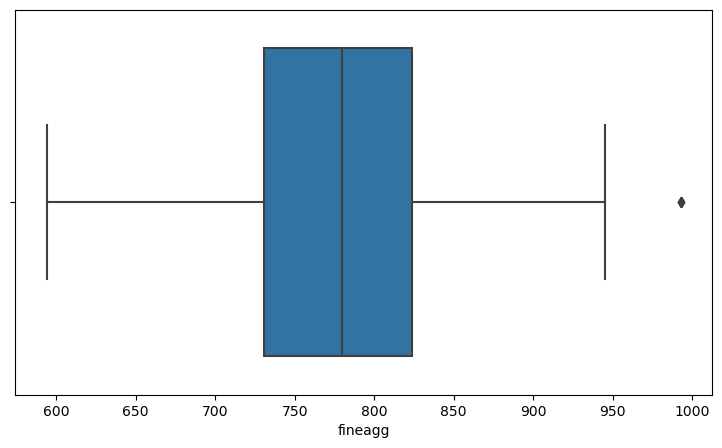

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

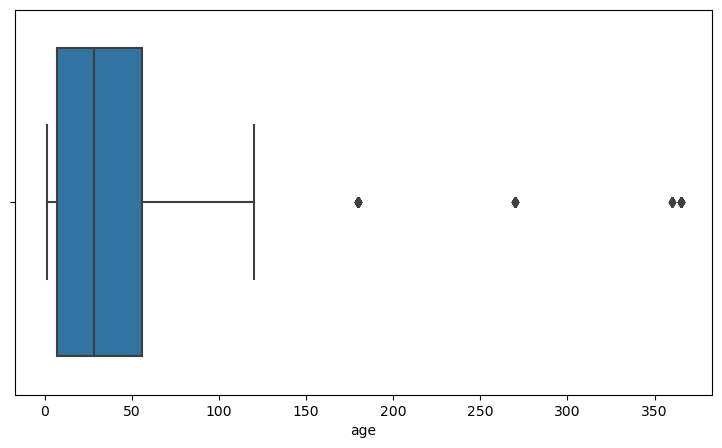

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

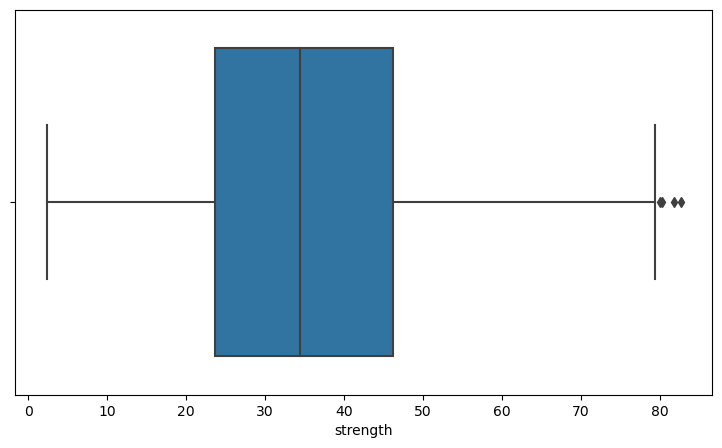

In [18]:
for i in range(len(df.columns)):
    plt.figure(figsize=(9,5))
    sns.boxplot(x=df.columns[i],data=df)
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 900x500 with 0 Axes>

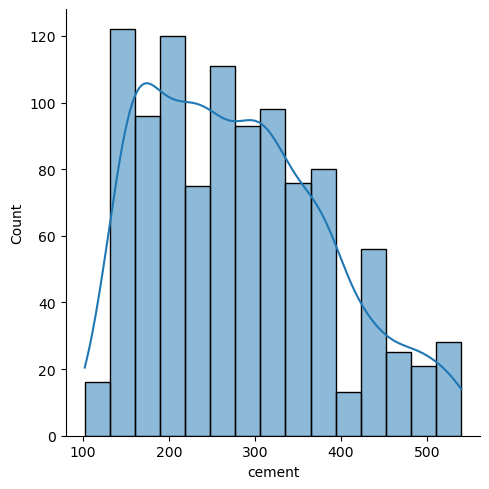

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 900x500 with 0 Axes>

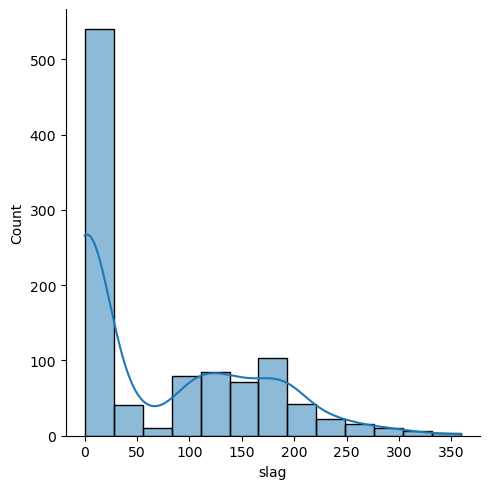

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 900x500 with 0 Axes>

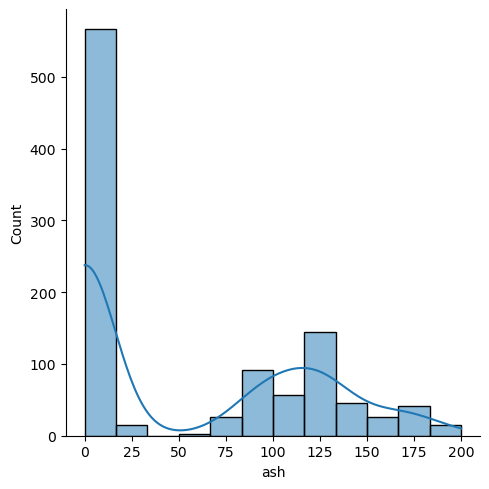

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 900x500 with 0 Axes>

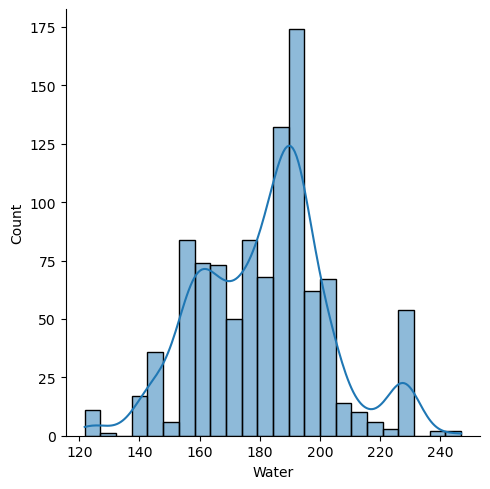

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 900x500 with 0 Axes>

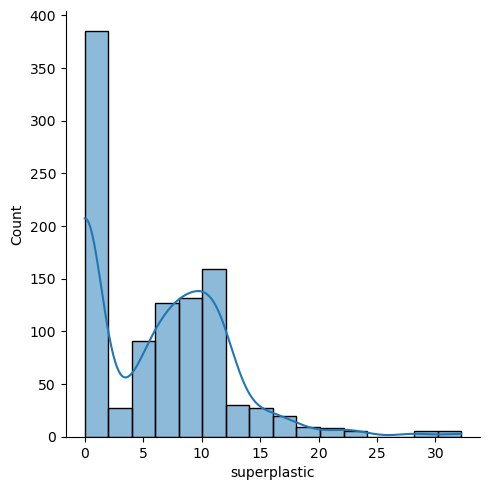

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 900x500 with 0 Axes>

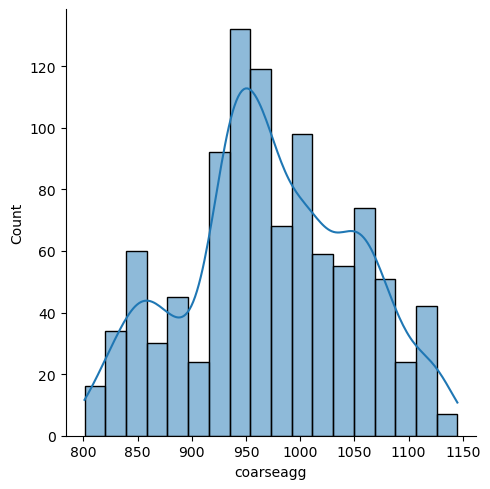

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 900x500 with 0 Axes>

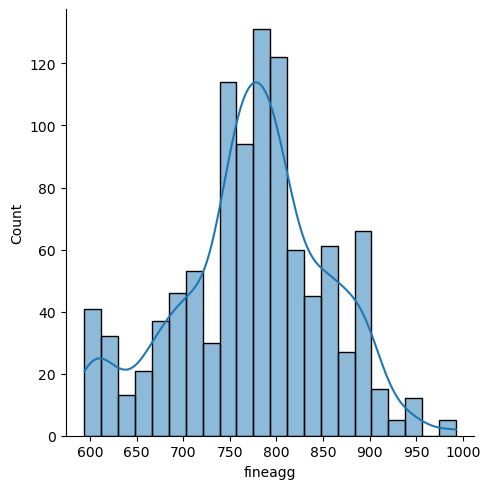

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 900x500 with 0 Axes>

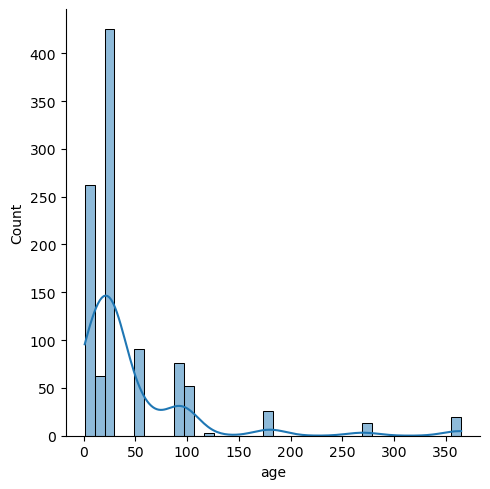

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 900x500 with 0 Axes>

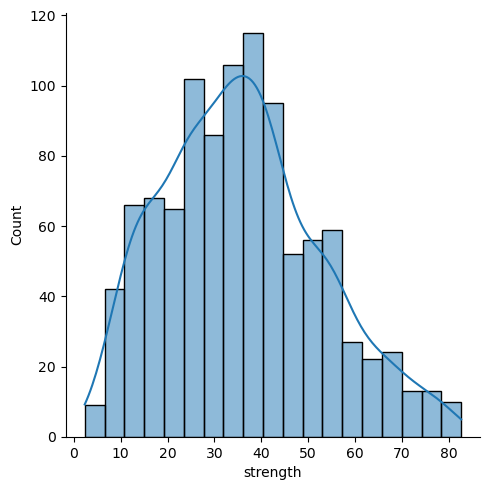

In [28]:
for i in range(len(df.columns)):
    plt.figure(figsize=(9,5))
    sns.displot(x=df[df.columns[i]],kde=True)
    plt.show()

### Correlation map

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

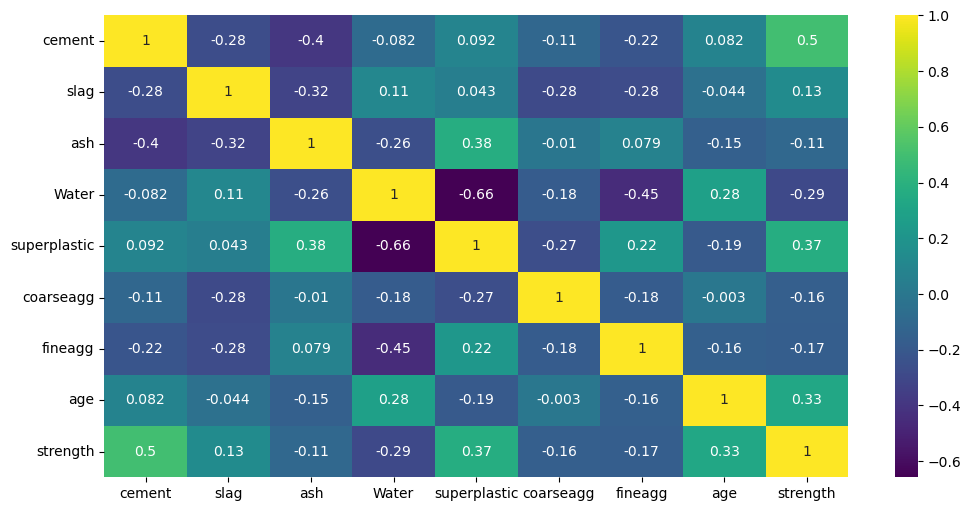

In [29]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='viridis',annot=True)
plt.show()

#### CHECKING FOR OUTLIERS

In [6]:
print('Outliers in cement: ', df[((df.cement - df.cement.mean())/df.cement.std()).abs()>3]['cement'].count())
print('Outliers in slag: ', df[((df.slag - df.slag.mean())/df.slag.std()).abs()>3]['slag'].count())
print('Outliers in ash: ', df[((df.ash - df.ash.mean())/df.ash.std()).abs()>3]['ash'].count())
print('Outliers in water: ', df[((df.Water - df.Water.mean())/df.Water.std()).abs()>3]['Water'].count())
print('Outliers in superplastic: ', df[((df.superplastic - df.superplastic.mean())/df.superplastic.std()).abs()>3]['superplastic'].count())
print('Outliers in coarseagg: ', df[((df.coarseagg - df.coarseagg.mean())/df.coarseagg.std()).abs()>3]['coarseagg'].count())
print('Outliers in fineagg: ', df[((df.fineagg - df.fineagg.mean())/df.fineagg.std()).abs()>3]['fineagg'].count())
print('Outliers in age: ', df[((df.age - df.age.mean())/df.age.std()).abs()>3]['age'].count())

Outliers in cement:  0
Outliers in slag:  4
Outliers in ash:  0
Outliers in water:  2
Outliers in superplastic:  10
Outliers in coarseagg:  0
Outliers in fineagg:  0
Outliers in age:  33


##### REPLACING THE OUTLIERS

In [93]:
for cols in df.columns[:-1]:
  Q1 = df[cols].quantile(0.25)
  Q3 = df[cols].quantile(0.75)
  iqr = Q3 - Q1

  low = Q1-1.5*iqr
  high = Q3+1.5*iqr
  df.loc[(df[cols] < low) | (df[cols] > high), cols] = df[cols].median()

In [8]:
print('Outliers in cement: ', df[((df.cement - df.cement.mean())/df.cement.std()).abs()>3]['cement'].count())
print('Outliers in slag: ', df[((df.slag - df.slag.mean())/df.slag.std()).abs()>3]['slag'].count())
print('Outliers in ash: ', df[((df.ash - df.ash.mean())/df.ash.std()).abs()>3]['ash'].count())
print('Outliers in water: ', df[((df.Water - df.Water.mean())/df.Water.std()).abs()>3]['Water'].count())
print('Outliers in superplastic: ', df[((df.superplastic - df.superplastic.mean())/df.superplastic.std()).abs()>3]['superplastic'].count())
print('Outliers in coarseagg: ', df[((df.coarseagg - df.coarseagg.mean())/df.coarseagg.std()).abs()>3]['coarseagg'].count())
print('Outliers in fineagg: ', df[((df.fineagg - df.fineagg.mean())/df.fineagg.std()).abs()>3]['fineagg'].count())
print('Outliers in age: ', df[((df.age - df.age.mean())/df.age.std()).abs()>3]['age'].count())

Outliers in cement:  0
Outliers in slag:  2
Outliers in ash:  0
Outliers in water:  0
Outliers in superplastic:  5
Outliers in coarseagg:  0
Outliers in fineagg:  0
Outliers in age:  3


# Feature Engineering

In [92]:
df.head()

,cement,slag,ash,Water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [12]:
# Create the x & y data sets
x = df.drop('strength', axis =1)
y = df['strength']

In [13]:
from scipy.stats import zscore

xscaled = x.apply(zscore)
xscaled_df = pd.DataFrame(xscaled, columns=df.columns)

<IPython.core.display.Javascript object>

In [14]:
# Split the data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

# BUILDING THE MODELS

In [17]:
def md_eval(model):
    print(f"Training Score: {round(model.score(x_train,y_train)*100,2)}")
    print(f"Test Score: {round(model.score(x_test,y_test)*100,2)}")

In [26]:
def mse(pred):
    print(f"MSE: {metrics.mean_squared_error(y_test,pred)}")

In [148]:
def r2_acc(pred):
    return round((metrics.r2_score(y_test, pred))*100,2)

In [155]:
def add_df(df_acc,model,model_acc):
       return df_acc.append({'Model':model,'Accuracy Score':f'{model_acc}%'},ignore_index=True)

### 1. Random Forest

In [235]:
# Import the libraries
from sklearn.ensemble import RandomForestRegressor

# Create the model
model_rf = RandomForestRegressor(criterion = 'squared_error', max_depth = 18, n_estimators = 200)

# Fit the model
model_rf.fit(x_train, y_train)

# predict the model
rf_pred = model_rf.predict(x_test)

# Evaluate the model
md_eval(model_rf)

# R2 score
acc_rf = r2_acc(rf_pred)
print(f"R2 SCORE: {acc_rf}")


# Getting the MSE
# MSE must be below 10
mse(rf_pred)

Training Score: 98.31
Test Score: 86.56


<IPython.core.display.Javascript object>

R2 SCORE: 86.56


<IPython.core.display.Javascript object>

MSE: 34.6194775589065


In [162]:
# storing the accuracy results for each model in a dataframe for final comparison
df_acc = pd.DataFrame(columns=['Model','Accuracy Score'])
df_acc

<IPython.core.display.Javascript object>

,Model,Accuracy Score


In [163]:
df_acc = add_df(df_acc,'Random Forest Regressor',acc_rf)

C:\Users\CJay\AppData\Local\Temp\ipykernel_2940\1509760791.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return df_acc.append({'Model':model,'Accuracy Score':f'{model_acc}%'},ignore_index=True)


In [185]:
df_acc


,Model,Accuracy Score
0,Random Forest Regressor,86.69%
1,Random Forest Regressor K-Fold,91.04%
2,Gradient Boosting Regressor,87.82%
3,Gradient Boosting Regressor,92.46%


#### GETTING THE KFOLD CROSS VALIDATION

In [165]:
def k_fold(model):  
    k = 20
    kfold = KFold(n_splits = k, random_state=42,shuffle=True)
    k_results = cross_val_score(model,x,y,cv=kfold)
    accuracy = round(np.mean(abs(k_results))*100,2)
    return accuracy

In [166]:
df_acc = add_df(df_acc,'Random Forest Regressor K-Fold',k_fold(model_rf))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\CJay\AppData\Local\Temp\ipykernel_2940\1509760791.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return df_acc.append({'Model':model,'Accuracy Score':f'{model_acc}%'},ignore_index=True)


In [167]:
df_acc

,Model,Accuracy Score
0,Random Forest Regressor,86.69%
1,Random Forest Regressor K-Fold,91.04%


### 2. Gradient Boosting Regressor

In [168]:
# Import the libraries
from sklearn.ensemble import GradientBoostingRegressor

# Create the model
model_gbr = GradientBoostingRegressor(learning_rate = 0.01,
 max_depth = 8,
 n_estimators = 1000,
 subsample = 0.9)

# Fit the model
model_gbr.fit(x_train,y_train)

# Predict the model
gbr_pred = model_gbr.predict(x_test)

# Score of the model
md_eval(model_gbr)

# r2 score
gbr_acc = r2_acc(gbr_pred)
print(f"R2 Score: {gbr_acc}")

# MSE
mse(gbr_pred)

Training Score: 99.34
Test Score: 87.82


<IPython.core.display.Javascript object>

R2 Score: 87.82


<IPython.core.display.Javascript object>

MSE: 31.397570901491505


In [169]:
df_acc = add_df(df_acc,'Gradient Boosting Regressor',gbr_acc)

C:\Users\CJay\AppData\Local\Temp\ipykernel_2940\1509760791.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return df_acc.append({'Model':model,'Accuracy Score':f'{model_acc}%'},ignore_index=True)


In [170]:
df_acc

,Model,Accuracy Score
0,Random Forest Regressor,86.69%
1,Random Forest Regressor K-Fold,91.04%
2,Gradient Boosting Regressor,87.82%


#### GETTING THE K-FOLD VALIDATION

In [188]:
df_acc = add_df(df_acc,'Gradient Boosting Regressor K-Fold',k_fold(model_gbr))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\CJay\AppData\Local\Temp\ipykernel_2940\1509760791.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return df_acc.append({'Model':model,'Accuracy Score':f'{model_acc}%'},ignore_index=True)


In [189]:
df_acc

,Model,Accuracy Score
0,Random Forest Regressor,86.69%
1,Random Forest Regressor K-Fold,91.04%
2,Gradient Boosting Regressor,87.82%
3,Gradient Boosting Regressor,92.46%
4,Gradient Boosting Regressor K-Fold,92.52%


In [195]:
df_acc

,Model,Accuracy Score
0,Random Forest Regressor,86.69%
1,Random Forest Regressor K-Fold,91.04%
2,Gradient Boosting Regressor,87.82%
4,Gradient Boosting Regressor K-Fold,92.52%


### 3. KNN Regressor

In [205]:
from sklearn.neighbors import KNeighborsRegressor
# Checking for different values of neighbors to determine k

diff_k = []
for i in range(1,45):
    model_knn = KNeighborsRegressor(n_neighbors = i)
    model_knn.fit(x_train,y_train)
    pred_i = model_knn.predict(x_test)
    diff_k.append(np.mean(pred_i!=y_test))
   


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[0.8640776699029126, 0.9805825242718447, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [220]:
# Import library
from sklearn.neighbors import KNeighborsRegressor

# Create the model
model_knn = KNeighborsRegressor(algorithm = 'brute', n_neighbors = 7, p =  2, weights = 'distance')

# Fit the model
model_knn.fit(x_train,y_train)

# Preditc the model
knn_pred = model_knn.predict(x_test)

# Evaluate the model
md_eval(model_knn)

# R2 Score
knn_acc = r2_acc(knn_pred)
print(f"R2 Score: {knn_acc}")

# MSE
mse(knn_pred)

Training Score: 99.36
Test Score: 78.23


<IPython.core.display.Javascript object>

R2 Score: 78.23


<IPython.core.display.Javascript object>

MSE: 56.107954997912266


In [221]:
df_acc = add_df(df_acc,'KNN Regressor',knn_acc)

C:\Users\CJay\AppData\Local\Temp\ipykernel_2940\1509760791.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return df_acc.append({'Model':model,'Accuracy Score':f'{model_acc}%'},ignore_index=True)


In [222]:
df_acc

,Model,Accuracy Score
0,Random Forest Regressor,86.69%
1,Random Forest Regressor K-Fold,91.04%
2,Gradient Boosting Regressor,87.82%
3,Gradient Boosting Regressor K-Fold,92.52%
4,KNN Regressor,78.23%


#### K-FOLD VALIDATION

In [223]:
df_acc = add_df(df_acc,'KNN Regressor K-Fold',k_fold(model_knn))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\CJay\AppData\Local\Temp\ipykernel_2940\1509760791.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return df_acc.append({'Model':model,'Accuracy Score':f'{model_acc}%'},ignore_index=True)


In [224]:
df_acc

,Model,Accuracy Score
0,Random Forest Regressor,86.69%
1,Random Forest Regressor K-Fold,91.04%
2,Gradient Boosting Regressor,87.82%
3,Gradient Boosting Regressor K-Fold,92.52%
4,KNN Regressor,78.23%
5,KNN Regressor K-Fold,78.04%


### 4. AdaBoost

In [225]:
# Import library
from sklearn.ensemble import AdaBoostRegressor

# Create the model
model_ada = AdaBoostRegressor()

# Fit the model
model_ada.fit(x_train,y_train)

# Predict the model
ada_pred = model_ada.predict(x_test)

# Evaluate the model score
md_eval(model_ada)

# R2 Score
ada_acc = r2_acc(ada_pred)
print(f"R2 Score: {ada_acc}")

# MSE
mse(ada_pred)

Training Score: 82.07
Test Score: 74.08


<IPython.core.display.Javascript object>

R2 Score: 74.08


<IPython.core.display.Javascript object>

MSE: 66.79337260133069


In [226]:
df_acc = add_df(df_acc,'AdaBoost Regressor',ada_acc)

C:\Users\CJay\AppData\Local\Temp\ipykernel_2940\1509760791.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return df_acc.append({'Model':model,'Accuracy Score':f'{model_acc}%'},ignore_index=True)


In [227]:
df_acc

,Model,Accuracy Score
0,Random Forest Regressor,86.69%
1,Random Forest Regressor K-Fold,91.04%
2,Gradient Boosting Regressor,87.82%
3,Gradient Boosting Regressor K-Fold,92.52%
4,KNN Regressor,78.23%
5,KNN Regressor K-Fold,78.04%
6,AdaBoost Regressor,74.08%


In [228]:
#### K-fold Validation
df_acc = add_df(df_acc,"AdaBoost Regressor K-Fold",k_fold(model_ada))
df_acc

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\CJay\AppData\Local\Temp\ipykernel_2940\1509760791.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return df_acc.append({'Model':model,'Accuracy Score':f'{model_acc}%'},ignore_index=True)


,Model,Accuracy Score
0,Random Forest Regressor,86.69%
1,Random Forest Regressor K-Fold,91.04%
2,Gradient Boosting Regressor,87.82%
3,Gradient Boosting Regressor K-Fold,92.52%
4,KNN Regressor,78.23%
5,KNN Regressor K-Fold,78.04%
6,AdaBoost Regressor,74.08%
7,AdaBoost Regressor K-Fold,77.44%


### 5. Bagging Regressor

In [237]:
# import the library
from sklearn.ensemble import BaggingRegressor

# Create the model
model_br = BaggingRegressor()

# Fit the model
model_br.fit(x_train,y_train)

# Predict the model
br_pred = model_br.predict(x_test)

# Evaluate the model score
md_eval(model_br)

# R2 score
br_acc = r2_acc(br_pred)
print(f"R2 SCore: {br_acc}")

# MSE
mse(br_pred)

Training Score: 97.87
Test Score: 86.62


<IPython.core.display.Javascript object>

R2 SCore: 86.62


<IPython.core.display.Javascript object>

MSE: 34.470942598028806


In [238]:
df_acc = add_df(df_acc,'Bagging Regressor',br_acc)
df_acc

C:\Users\CJay\AppData\Local\Temp\ipykernel_2940\1509760791.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return df_acc.append({'Model':model,'Accuracy Score':f'{model_acc}%'},ignore_index=True)


,Model,Accuracy Score
0,Random Forest Regressor,86.69%
1,Random Forest Regressor K-Fold,91.04%
2,Gradient Boosting Regressor,87.82%
3,Gradient Boosting Regressor K-Fold,92.52%
4,KNN Regressor,78.23%
5,KNN Regressor K-Fold,78.04%
6,AdaBoost Regressor,74.08%
7,AdaBoost Regressor K-Fold,77.44%
8,Bagging Regressor,86.62%


#### K-Fold Validation

In [239]:
df_acc = add_df(df_acc,'Bagging Regressor K-Fold',k_fold(model_br))
df_acc

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\CJay\AppData\Local\Temp\ipykernel_2940\1509760791.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return df_acc.append({'Model':model,'Accuracy Score':f'{model_acc}%'},ignore_index=True)


,Model,Accuracy Score
0,Random Forest Regressor,86.69%
1,Random Forest Regressor K-Fold,91.04%
2,Gradient Boosting Regressor,87.82%
3,Gradient Boosting Regressor K-Fold,92.52%
4,KNN Regressor,78.23%
5,KNN Regressor K-Fold,78.04%
6,AdaBoost Regressor,74.08%
7,AdaBoost Regressor K-Fold,77.44%
8,Bagging Regressor,86.62%
9,Bagging Regressor K-Fold,89.96%


### 6. Support Vector Regressor

In [240]:
# Import the library 
from sklearn.svm import SVR

# Create the model 
model_svr = SVR(kernel = 'linear')

# Fit the model
model_svr.fit(x_train,y_train)

# predict the model
svr_pred = model_svr.predict(x_test)

# Evaluate the Model Score
md_eval(model_svr)

# R2 Score
svr_acc = r2_acc(svr_pred)
print(f"R2 SCORE: {svr_acc}")

# MSE
mse(svr_pred)

Training Score: 71.89
Test Score: 68.86


<IPython.core.display.Javascript object>

R2 SCORE: 68.86


<IPython.core.display.Javascript object>

MSE: 80.24904015293147


In [241]:
df_acc = add_df(df_acc,'Support Vector Regressor',svr_acc)

C:\Users\CJay\AppData\Local\Temp\ipykernel_2940\1509760791.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return df_acc.append({'Model':model,'Accuracy Score':f'{model_acc}%'},ignore_index=True)


#### K-Fold Validation

In [242]:
df_acc = add_df(df_acc,'Support Vector Regressor K-Fold',k_fold(model_svr))
df_acc

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\CJay\AppData\Local\Temp\ipykernel_2940\1509760791.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return df_acc.append({'Model':model,'Accuracy Score':f'{model_acc}%'},ignore_index=True)


,Model,Accuracy Score
0,Random Forest Regressor,86.69%
1,Random Forest Regressor K-Fold,91.04%
2,Gradient Boosting Regressor,87.82%
3,Gradient Boosting Regressor K-Fold,92.52%
4,KNN Regressor,78.23%
5,KNN Regressor K-Fold,78.04%
6,AdaBoost Regressor,74.08%
7,AdaBoost Regressor K-Fold,77.44%
8,Bagging Regressor,86.62%
9,Bagging Regressor K-Fold,89.96%


### 7. XGBoost Regressor

In [246]:
# import the libraries
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

# Create the model
model_xg = XGBRegressor()

#FIt the model
model_xg.fit(x_train, y_train)

# predict the model
xg_pred = model_xg.predict(x_test)

# Evaluate the model score
md_eval(model_xg)

# R2 SCore
xg_acc = r2_acc(xg_pred)
print(f'R2 SCORE: {xg_acc}')

# MSE
mse(xg_pred)

Training Score: 99.28
Test Score: 88.35


<IPython.core.display.Javascript object>

R2 SCORE: 88.35


<IPython.core.display.Javascript object>

MSE: 30.013989002442468


In [247]:
df_acc = add_df(df_acc,'XGBoost Regressor',xg_acc)

C:\Users\CJay\AppData\Local\Temp\ipykernel_2940\1509760791.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return df_acc.append({'Model':model,'Accuracy Score':f'{model_acc}%'},ignore_index=True)


### K-Fold Validation

In [248]:
df_acc = add_df(df_acc,'XGBoost Regressor K-Fold',k_fold(model_xg))
df_acc

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\CJay\AppData\Local\Temp\ipykernel_2940\1509760791.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return df_acc.append({'Model':model,'Accuracy Score':f'{model_acc}%'},ignore_index=True)


,Model,Accuracy Score
0,Random Forest Regressor,86.69%
1,Random Forest Regressor K-Fold,91.04%
2,Gradient Boosting Regressor,87.82%
3,Gradient Boosting Regressor K-Fold,92.52%
4,KNN Regressor,78.23%
5,KNN Regressor K-Fold,78.04%
6,AdaBoost Regressor,74.08%
7,AdaBoost Regressor K-Fold,77.44%
8,Bagging Regressor,86.62%
9,Bagging Regressor K-Fold,89.96%


### 8. DecisionTree Regression

In [252]:
# Import the Libraries
from sklearn.tree import DecisionTreeRegressor

# Create the model
model_dtr = DecisionTreeRegressor()

# Fit the model
model_dtr.fit(x_train,y_train)

#predict the model
dtr_pred = model_dtr.predict(x_test)

# Evaluate the model score
md_eval(model_dtr)

# R2 SCORE
dtr_acc = r2_acc(dtr_pred)
print(f"R2 SCORE: {dtr_acc}")

# MSE
mse(dtr_pred)

Training Score: 99.36
Test Score: 82.86


<IPython.core.display.Javascript object>

R2 SCORE: 82.86


<IPython.core.display.Javascript object>

MSE: 44.17157354368933


In [253]:
df_acc = add_df(df_acc,'Decision Tree Regression', dtr_acc)


C:\Users\CJay\AppData\Local\Temp\ipykernel_2940\1509760791.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return df_acc.append({'Model':model,'Accuracy Score':f'{model_acc}%'},ignore_index=True)


#### K-Fold Validation

In [254]:
df_acc = add_df(df_acc,'Decision Tree Regression K-Fold',k_fold(model_dtr))
df_acc

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\CJay\AppData\Local\Temp\ipykernel_2940\1509760791.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return df_acc.append({'Model':model,'Accuracy Score':f'{model_acc}%'},ignore_index=True)


,Model,Accuracy Score
0,Random Forest Regressor,86.69%
1,Random Forest Regressor K-Fold,91.04%
2,Gradient Boosting Regressor,87.82%
3,Gradient Boosting Regressor K-Fold,92.52%
4,KNN Regressor,78.23%
5,KNN Regressor K-Fold,78.04%
6,AdaBoost Regressor,74.08%
7,AdaBoost Regressor K-Fold,77.44%
8,Bagging Regressor,86.62%
9,Bagging Regressor K-Fold,89.96%


### TRYING DIFF DATA

In [255]:
df2 = df.copy()

In [269]:
x1 = df2.drop(['strength','ash','fineagg','coarseagg'],axis = 1)
y1 = df2['strength']

# train and test the data
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1,y1,test_size=0.2,random_state=42)

In [270]:
x_train1 = x_train1.apply(zscore)
x_test1 = x_test1.apply(zscore)

In [272]:
# Import the Libraries
from sklearn.tree import DecisionTreeRegressor

# Create the model
model_dtr2 = DecisionTreeRegressor()

# Fit the model
model_dtr2.fit(x_train1,y_train1)

#predict the model
dtr_pred2 = model_dtr2.predict(x_test1)

# # Evaluate the model score
# md_eval(model_dtr2)

# # R2 SCORE
# dtr_acc2 = r2_acc(dtr_pred2)
# print(f"R2 SCORE: {dtr_acc2}")

# # MSE
# mse(dtr_pred2)

In [273]:
# Evaluate the model score
model_dtr2.score(x_train1,y_train1)

0.9918341684959451

In [274]:
model_dtr2.score(x_test1,y_test1)

0.7292352095499395

In [282]:
dtr_acc2 = f"{round(metrics.r2_score(y_test1,dtr_pred2)*100,2)}"
dtr_acc2

<IPython.core.display.Javascript object>

'72.92'

In [283]:
df_acc = add_df(df_acc,'Decision Tree Regressor 2',dtr_acc2)

C:\Users\CJay\AppData\Local\Temp\ipykernel_2940\1509760791.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return df_acc.append({'Model':model,'Accuracy Score':f'{model_acc}%'},ignore_index=True)


In [284]:
df_acc

,Model,Accuracy Score
0,Random Forest Regressor,86.69%
1,Random Forest Regressor K-Fold,91.04%
2,Gradient Boosting Regressor,87.82%
3,Gradient Boosting Regressor K-Fold,92.52%
4,KNN Regressor,78.23%
5,KNN Regressor K-Fold,78.04%
6,AdaBoost Regressor,74.08%
7,AdaBoost Regressor K-Fold,77.44%
8,Bagging Regressor,86.62%
9,Bagging Regressor K-Fold,89.96%


#### K-Fold Validation

In [285]:
df_acc = add_df(df_acc,'Decision Tree Regressor 2 K-Fold',k_fold(model_dtr2))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\CJay\AppData\Local\Temp\ipykernel_2940\1509760791.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return df_acc.append({'Model':model,'Accuracy Score':f'{model_acc}%'},ignore_index=True)


In [286]:
df_acc

,Model,Accuracy Score
0,Random Forest Regressor,86.69%
1,Random Forest Regressor K-Fold,91.04%
2,Gradient Boosting Regressor,87.82%
3,Gradient Boosting Regressor K-Fold,92.52%
4,KNN Regressor,78.23%
5,KNN Regressor K-Fold,78.04%
6,AdaBoost Regressor,74.08%
7,AdaBoost Regressor K-Fold,77.44%
8,Bagging Regressor,86.62%
9,Bagging Regressor K-Fold,89.96%


### TRYING DIFF DATA AGAIN

In [293]:
xscaled=x.apply(zscore)
xscaled_df=pd.DataFrame(xscaled)

In [298]:
#Split the X and y into training and test set in 70:30 ratio
x_train,x_test, y_train,y_test = train_test_split(xscaled,y, test_size=0.2,random_state = 42)

In [299]:
model_dtr3=DecisionTreeRegressor(max_depth=4, random_state=42,min_samples_leaf=5)
model_dtr3.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=5, random_state=42)

In [300]:
#predict the model
dtr_pred3 = model_dtr3.predict(x_test)

# Evaluate the model score
md_eval(model_dtr3)

# R2 SCORE
dtr_acc3 = r2_acc(dtr_pred3)
print(f"R2 SCORE: {dtr_acc3}")

# MSE
mse(dtr_pred3)

Training Score: 74.67
Test Score: 56.52


<IPython.core.display.Javascript object>

R2 SCORE: 56.52


<IPython.core.display.Javascript object>

MSE: 112.04458099668378


In [301]:
df_acc = add_df(df_acc,'Decision Tree 3', dtr_acc3)
df_acc

C:\Users\CJay\AppData\Local\Temp\ipykernel_2940\1509760791.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return df_acc.append({'Model':model,'Accuracy Score':f'{model_acc}%'},ignore_index=True)


,Model,Accuracy Score
0,Random Forest Regressor,86.69%
1,Random Forest Regressor K-Fold,91.04%
2,Gradient Boosting Regressor,87.82%
3,Gradient Boosting Regressor K-Fold,92.52%
4,KNN Regressor,78.23%
5,KNN Regressor K-Fold,78.04%
6,AdaBoost Regressor,74.08%
7,AdaBoost Regressor K-Fold,77.44%
8,Bagging Regressor,86.62%
9,Bagging Regressor K-Fold,89.96%


In [303]:
df_acc = add_df(df_acc,'Decision Tree 3 K-Fold', k_fold(model_dtr3))
df_acc

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\CJay\AppData\Local\Temp\ipykernel_2940\1509760791.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return df_acc.append({'Model':model,'Accuracy Score':f'{model_acc}%'},ignore_index=True)


,Model,Accuracy Score
0,Random Forest Regressor,86.69%
1,Random Forest Regressor K-Fold,91.04%
2,Gradient Boosting Regressor,87.82%
3,Gradient Boosting Regressor K-Fold,92.52%
4,KNN Regressor,78.23%
5,KNN Regressor K-Fold,78.04%
6,AdaBoost Regressor,74.08%
7,AdaBoost Regressor K-Fold,77.44%
8,Bagging Regressor,86.62%
9,Bagging Regressor K-Fold,89.96%


**Gradient Boost Regressor, Support Vector Regressor, Bagging Regressor** and **Random Forest**   seems to do well in the scenario. We can choose either of them.

* **Gradient Boost Regressor has the highest accuracy**